Logistic Regression
=========

Libraries:

In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("ggplot")

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_fscore_support, auc, accuracy_score

from scipy import interp

#### Read Data:

In [2]:
data = pd.read_csv("/media/juanan/DATA/loan_data_analysis/data/loans_processed.csv", sep = "^")\
                   .sample(200000)

In [3]:
data = data.reset_index()
data = data.drop("index", axis = 1)

In [4]:
data.head()

,addr_state,annual_inc,application_type,avg_cur_bal,bc_open_to_buy,bc_util,delinq_2yrs,delinq_amnt,disbursement_method,dti,...,sub_grade,tax_liens,term,tot_coll_amt,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,verification_status,zip_code
0,OH,36900.0,Individual,19688.0,2468.0,70.3,0.0,0.0,Cash,16.62,...,D4,0.0,36 months,0.0,169197.0,18290.0,8300.0,16088.0,Source Verified,442xx
1,KS,80000.0,Individual,69321.0,1375.0,98.0,0.0,0.0,Cash,1.25,...,D1,0.0,36 months,0.0,214575.0,1493.0,1375.0,0.0,Not Verified,660xx
2,NC,24000.0,Individual,1062.0,369.0,82.4,0.0,0.0,Cash,20.35,...,C5,0.0,36 months,0.0,16452.0,5311.0,2100.0,10852.0,Not Verified,281xx
3,VA,55584.0,Individual,5173.0,648.0,7.4,0.0,0.0,Cash,14.51,...,B5,0.0,36 months,0.0,37336.0,31040.0,700.0,32636.0,Source Verified,234xx
4,CA,90000.0,Individual,25980.0,15782.0,50.2,0.0,0.0,Cash,20.38,...,A4,0.0,36 months,0.0,475114.0,50912.0,31700.0,47114.0,Verified,913xx


In [5]:
data.shape

(200000, 50)

#### Pre-processing:

Normalization:

In [6]:
numeric_variables = data.loc[:,data.columns != "loan_status"]._get_numeric_data().columns

In [7]:
numeric_variables

Index(['annual_inc', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_2yrs',
       'delinq_amnt', 'dti', 'fico_range_high', 'fico_range_low',
       'funded_amnt', 'funded_amnt_inv', 'installment', 'int_rate',
       'loan_amnt', 'mort_acc', 'num_accts_ever_120_pd', 'num_bc_sats',
       'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts',
       'num_rev_tl_bal_gt_0', 'num_sats', 'open_acc', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal',
       'revol_util', 'tax_liens', 'tot_coll_amt', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'],
      dtype='object')

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(data[numeric_variables])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
data[numeric_variables] = scaler.transform(data[numeric_variables])

In [11]:
data.head()

,addr_state,annual_inc,application_type,avg_cur_bal,bc_open_to_buy,bc_util,delinq_2yrs,delinq_amnt,disbursement_method,dti,...,sub_grade,tax_liens,term,tot_coll_amt,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,verification_status,zip_code
0,OH,-0.594750,Individual,0.458919,-0.448256,0.382969,-0.358338,-0.019833,Cash,-0.143308,...,D4,-0.066931,36 months,-0.119529,0.061075,-0.597001,-0.550456,-0.519201,Source Verified,442xx
1,KS,0.074841,Individual,3.580961,-0.524922,1.359220,-0.358338,-0.019833,Cash,-1.886251,...,D1,-0.066931,36 months,-0.119529,0.320144,-0.959598,-0.885886,-0.905546,Not Verified,660xx
2,NC,-0.795162,Individual,-0.712703,-0.595484,0.809418,-0.358338,-0.019833,Cash,0.279670,...,C5,-0.066931,36 months,-0.119529,-0.810965,-0.877179,-0.850769,-0.644941,Not Verified,281xx
3,VA,-0.304480,Individual,-0.454111,-0.575915,-1.833859,-0.358338,-0.019833,Cash,-0.382580,...,B5,-0.066931,36 months,-0.119529,-0.691736,-0.321766,-0.918581,-0.121810,Source Verified,234xx
4,CA,0.230199,Individual,0.854702,0.485614,-0.325429,-0.358338,-0.019833,Cash,0.283072,...,A4,-0.066931,36 months,-0.119529,1.807593,0.107212,0.582984,0.225872,Verified,913xx


Categorical Variables:

In [12]:
categorical_variables = data.select_dtypes(include="object").columns

In [13]:
def categorical_to_numeric(variable):
    
    variable_dict = dict(data.groupby(variable)['loan_status'].mean())
    
    result = data[variable].map(lambda i: variable_dict[i])
    
    return result

In [14]:
for variable in categorical_variables:
    data[variable] = categorical_to_numeric(variable)

In [15]:
data.head()

,addr_state,annual_inc,application_type,avg_cur_bal,bc_open_to_buy,bc_util,delinq_2yrs,delinq_amnt,disbursement_method,dti,...,sub_grade,tax_liens,term,tot_coll_amt,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,verification_status,zip_code
0,0.224312,-0.594750,0.205985,0.458919,-0.448256,0.382969,-0.358338,-0.019833,0.205504,-0.143308,...,0.328114,-0.066931,0.165335,-0.119529,0.061075,-0.597001,-0.550456,-0.519201,0.222191,0.219512
1,0.170213,0.074841,0.205985,3.580961,-0.524922,1.359220,-0.358338,-0.019833,0.205504,-1.886251,...,0.272921,-0.066931,0.165335,-0.119529,0.320144,-0.959598,-0.885886,-0.905546,0.150110,0.131965
2,0.219543,-0.795162,0.205985,-0.712703,-0.595484,0.809418,-0.358338,-0.019833,0.205504,0.279670,...,0.255857,-0.066931,0.165335,-0.119529,-0.810965,-0.877179,-0.850769,-0.644941,0.150110,0.187879
3,0.207092,-0.304480,0.205985,-0.454111,-0.575915,-1.833859,-0.358338,-0.019833,0.205504,-0.382580,...,0.164932,-0.066931,0.165335,-0.119529,-0.691736,-0.321766,-0.918581,-0.121810,0.222191,0.241814
4,0.196817,0.230199,0.205985,0.854702,0.485614,-0.325429,-0.358338,-0.019833,0.205504,0.283072,...,0.069071,-0.066931,0.165335,-0.119529,1.807593,0.107212,0.582984,0.225872,0.240139,0.208645


In [16]:
data.shape

(200000, 50)

Target:

In [17]:
X = data.loc[:, data.columns!='loan_status']

In [18]:
y = data['loan_status']

Logistic Regression:
==========
___________________

Tuning regularization:

In [19]:
parameters = {'C': np.power(10.0, np.arange(-10, 10))}

GridSearch with Cross Validation:

In [20]:
log_reg = LogisticRegression(penalty='l2')

In [21]:
log_reg_classifier = GridSearchCV(log_reg, parameters, cv=3, scoring="roc_auc")

In [22]:
log_reg_classifier.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

__Cross Validation Results:__

In [23]:
pd.DataFrame(log_reg_classifier.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.217748,0.025129,0.671150,0.671623,1e-10,{'C': 1e-10},20,0.673929,0.671715,0.671059,0.672443,0.668461,0.670709,0.018389,0.000732,0.002233,0.000711
1,0.270192,0.024473,0.671155,0.671628,1e-09,{'C': 1e-09},19,0.673934,0.671721,0.671064,0.672448,0.668466,0.670714,0.002215,0.000066,0.002233,0.000711
2,0.272624,0.024691,0.671201,0.671674,1e-08,{'C': 1e-08},18,0.673978,0.671768,0.671107,0.672494,0.668517,0.670761,0.001286,0.000519,0.002231,0.000710
3,0.321214,0.024737,0.671660,0.672134,1e-07,{'C': 1e-07},17,0.674421,0.672230,0.671540,0.672942,0.669020,0.671230,0.023128,0.000528,0.002207,0.000702
4,0.378479,0.025309,0.676008,0.676489,1e-06,{'C': 1e-06},16,0.678610,0.676613,0.675688,0.677215,0.673727,0.675638,0.025492,0.001539,0.002007,0.000650
5,0.596891,0.024825,0.706895,0.707414,1e-05,{'C': 1e-05},15,0.708566,0.707617,0.706034,0.708070,0.706086,0.706555,0.027346,0.001184,0.001182,0.000635
6,1.017666,0.024936,0.816767,0.817236,0.0001,{'C': 0.0001},14,0.817339,0.817199,0.815586,0.817731,0.817374,0.816779,0.033223,0.001619,0.000835,0.000390
7,1.672364,0.023612,0.901455,0.901790,0.001,{'C': 0.001},13,0.901730,0.901793,0.900267,0.902074,0.902368,0.901502,0.021258,0.000101,0.000879,0.000234
8,2.421159,0.023516,0.915907,0.916220,0.01,{'C': 0.01},12,0.915776,0.916272,0.915221,0.916407,0.916725,0.915982,0.053784,0.000188,0.000621,0.000177
9,4.200649,0.023669,0.920067,0.920396,0.1,{'C': 0.1},11,0.919847,0.920429,0.919660,0.920520,0.920694,0.920240,0.074899,0.000152,0.000450,0.000117


Mean test and train scores are very close to each other, so it seems the model generalize good when new data is in.

In [24]:
log_reg_classifier.best_params_

{'C': 100000000.0}

In [25]:
log_reg_classifier.best_score_

0.9213964951001348

Model Evaluation
==========
_________________

Run classifier with cross-validation and plot __ROC curves__:

In [26]:
cv = StratifiedKFold(n_splits=5)
classifier = LogisticRegression(C=10)

In [27]:
# dataframes to numpy arrays
X = X.values
y = y.values

The following source code to plot ROC curves have been downloaded from [sklearn API](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html) with some metrics have been added for each cross validation split:

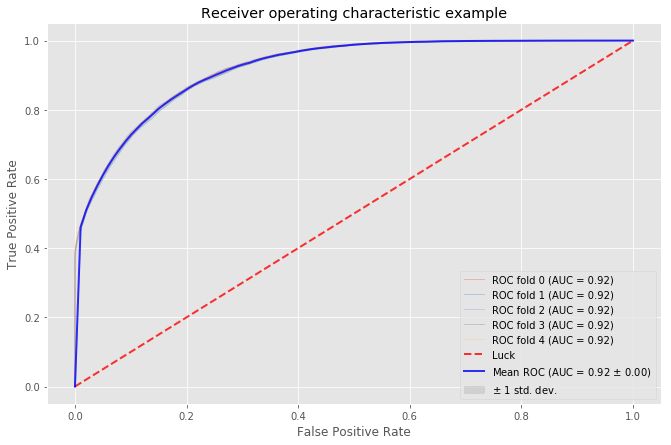

In [28]:
tprs = []
aucs = []
accuracies = []
precisions = []
recalls = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(11,7))

i = 0
for train, test in cv.split(X, y):
    classifier.fit(X[train], y[train])
    probas_ = classifier.predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    # accuracy
    predictions_ = classifier.predict(X[test])
    accuracy = accuracy_score(y[test], predictions_)
    accuracies.append(accuracy)
    
    # precisions
    precision = precision_recall_fscore_support(y[test], predictions_)[0][1]
    precisions.append(precision)
    
    # recall
    recall = precision_recall_fscore_support(y[test], predictions_)[1][1]
    recalls.append(recall)
    
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

__Metrics__ in the test set:

In [32]:
metrics = pd.DataFrame(
    {"auc": aucs,
     "accuracy": accuracies, 
     "precision": precisions, 
     "recall": recalls
    })

In [33]:
metrics

,accuracy,auc,precision,recall
0,0.884128,0.923419,0.824995,0.554773
1,0.880428,0.918542,0.814013,0.543235
2,0.883550,0.920981,0.817923,0.558659
3,0.882847,0.922759,0.820647,0.551318
4,0.882947,0.921536,0.814526,0.558484


In [34]:
metrics.apply(lambda i: np.mean(i), axis = 0)

accuracy     0.882780
auc          0.921447
precision    0.818421
recall       0.553294
dtype: float64

This model has a very robust performance regardless the fold we evaluate for a sample of 200000 observations (about 25% of the total data). We can consider a good starting point for comparing with other models more complex.